In [2]:
import nest_asyncio
nest_asyncio.apply()
import cmdstanpy as sp
import numpy as np
from scipy.optimize import curve_fit
import pandas as pd
import matplotlib.pyplot as plt
plt.ioff()
from cycler import cycler
import matplotlib.gridspec as gridspec

import matplotlib.patches as mpatches
import seaborn as sns
import arviz as az
import scipy.stats as stats
import ROOT as r
import time
import ctypes
plt.rcParams["xtick.minor.visible"] =  True
plt.rcParams["ytick.minor.visible"] =  True
plt.rcParams["mathtext.fontset"]="cm"
plt.rcParams['errorbar.capsize'] = 3
plt.rcParams['mathtext.rm'] = 'serif'
plt.rcParams['font.family']='serif'
plt.rcParams['font.size']=22
plt.rcParams['axes.grid'] = False
plt.rcParams['grid.linestyle']=':'
plt.rcParams['grid.color']='black'
plt.rcParams['axes.prop_cycle'] = cycler(color=['black', 'red', 'blue', 'green'])

import arviz as az
import warnings
warnings.filterwarnings('ignore')
%jsroot on

/home/jakob/.local/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Welcome to JupyROOT 6.26/04


In [3]:
diagnostics_df=pd.read_csv("./new_diagnostics.csv",index_col=0)
sigma_df=pd.read_csv('./new_sigma.csv',index_col=0)
ppd_df=pd.read_csv('./ppd.csv')
final_df=pd.read_csv('eta_data.csv',index_col=0)
chi2_df=pd.read_csv('./new_sigma_chi2.csv',index_col=0)


In [40]:
final_df

,phi,bin_phi,ebin_0,"costheta_bin_(0, 0)","A_(0, 0)","dA_(0, 0)",ebin_0.1,"costheta_bin_(0, 1)","A_(0, 1)","dA_(0, 1)",...,"A_(10, 9)","dA_(10, 9)",ebin_10.10,"costheta_bin_(10, 10)","A_(10, 10)","dA_(10, 10)",ebin_10.11,"costheta_bin_(10, 11)","A_(10, 11)","dA_(10, 11)"
0,-165.0,30.0,1130.0,-1.000000,-0.265339,0.833074,1130.0,-0.833333,-0.900645,0.765537,...,-0.378745,0.239784,1730.0,0.666667,-0.574855,0.178491,1730.0,0.833333,-0.252965,0.200185
1,-135.0,30.0,1190.0,-0.833333,-1.043565,0.852202,1190.0,-0.666667,-0.694357,0.852897,...,-1.339239,0.224441,1790.0,0.833333,-0.901786,0.180123,1790.0,1.000000,-0.364490,0.202632
2,-105.0,30.0,NaN,NaN,-0.205717,0.927090,NaN,NaN,0.389668,0.820376,...,-0.148203,0.235527,NaN,NaN,-0.443799,0.186708,NaN,NaN,-0.472582,0.213273
3,-75.0,30.0,NaN,NaN,-0.525458,1.039588,NaN,NaN,0.061074,0.744680,...,0.091831,0.240824,NaN,NaN,0.620919,0.175097,NaN,NaN,0.291436,0.207265
4,-45.0,30.0,NaN,NaN,-1.772324,1.006852,NaN,NaN,-1.216321,0.767082,...,0.668551,0.233154,NaN,NaN,0.745268,0.197550,NaN,NaN,0.746137,0.206350
5,-15.0,30.0,NaN,NaN,-0.513444,0.873702,NaN,NaN,0.696811,0.846061,...,0.526234,0.262603,NaN,NaN,0.237450,0.180799,NaN,NaN,0.071711,0.236688
6,15.0,30.0,NaN,NaN,0.421694,1.015312,NaN,NaN,-0.752515,0.749913,...,-0.317299,0.244631,NaN,NaN,-0.489057,0.194860,NaN,NaN,-0.098793,0.211410
7,45.0,30.0,NaN,NaN,-0.155598,0.887982,NaN,NaN,0.221272,0.720033,...,-0.796111,0.246982,NaN,NaN,-0.676905,0.177859,NaN,NaN,-0.481737,0.215056
8,75.0,30.0,NaN,NaN,1.209135,0.826779,NaN,NaN,1.733383,0.778480,...,-0.456139,0.240031,NaN,NaN,-0.545085,0.177072,NaN,NaN,-0.295510,0.206432
9,105.0,30.0,NaN,NaN,2.138400,0.923998,NaN,NaN,0.043086,0.753496,...,0.419704,0.233396,NaN,NaN,0.595451,0.180541,NaN,NaN,0.186165,0.203531


# Posterior predictive Checks energy bin 2

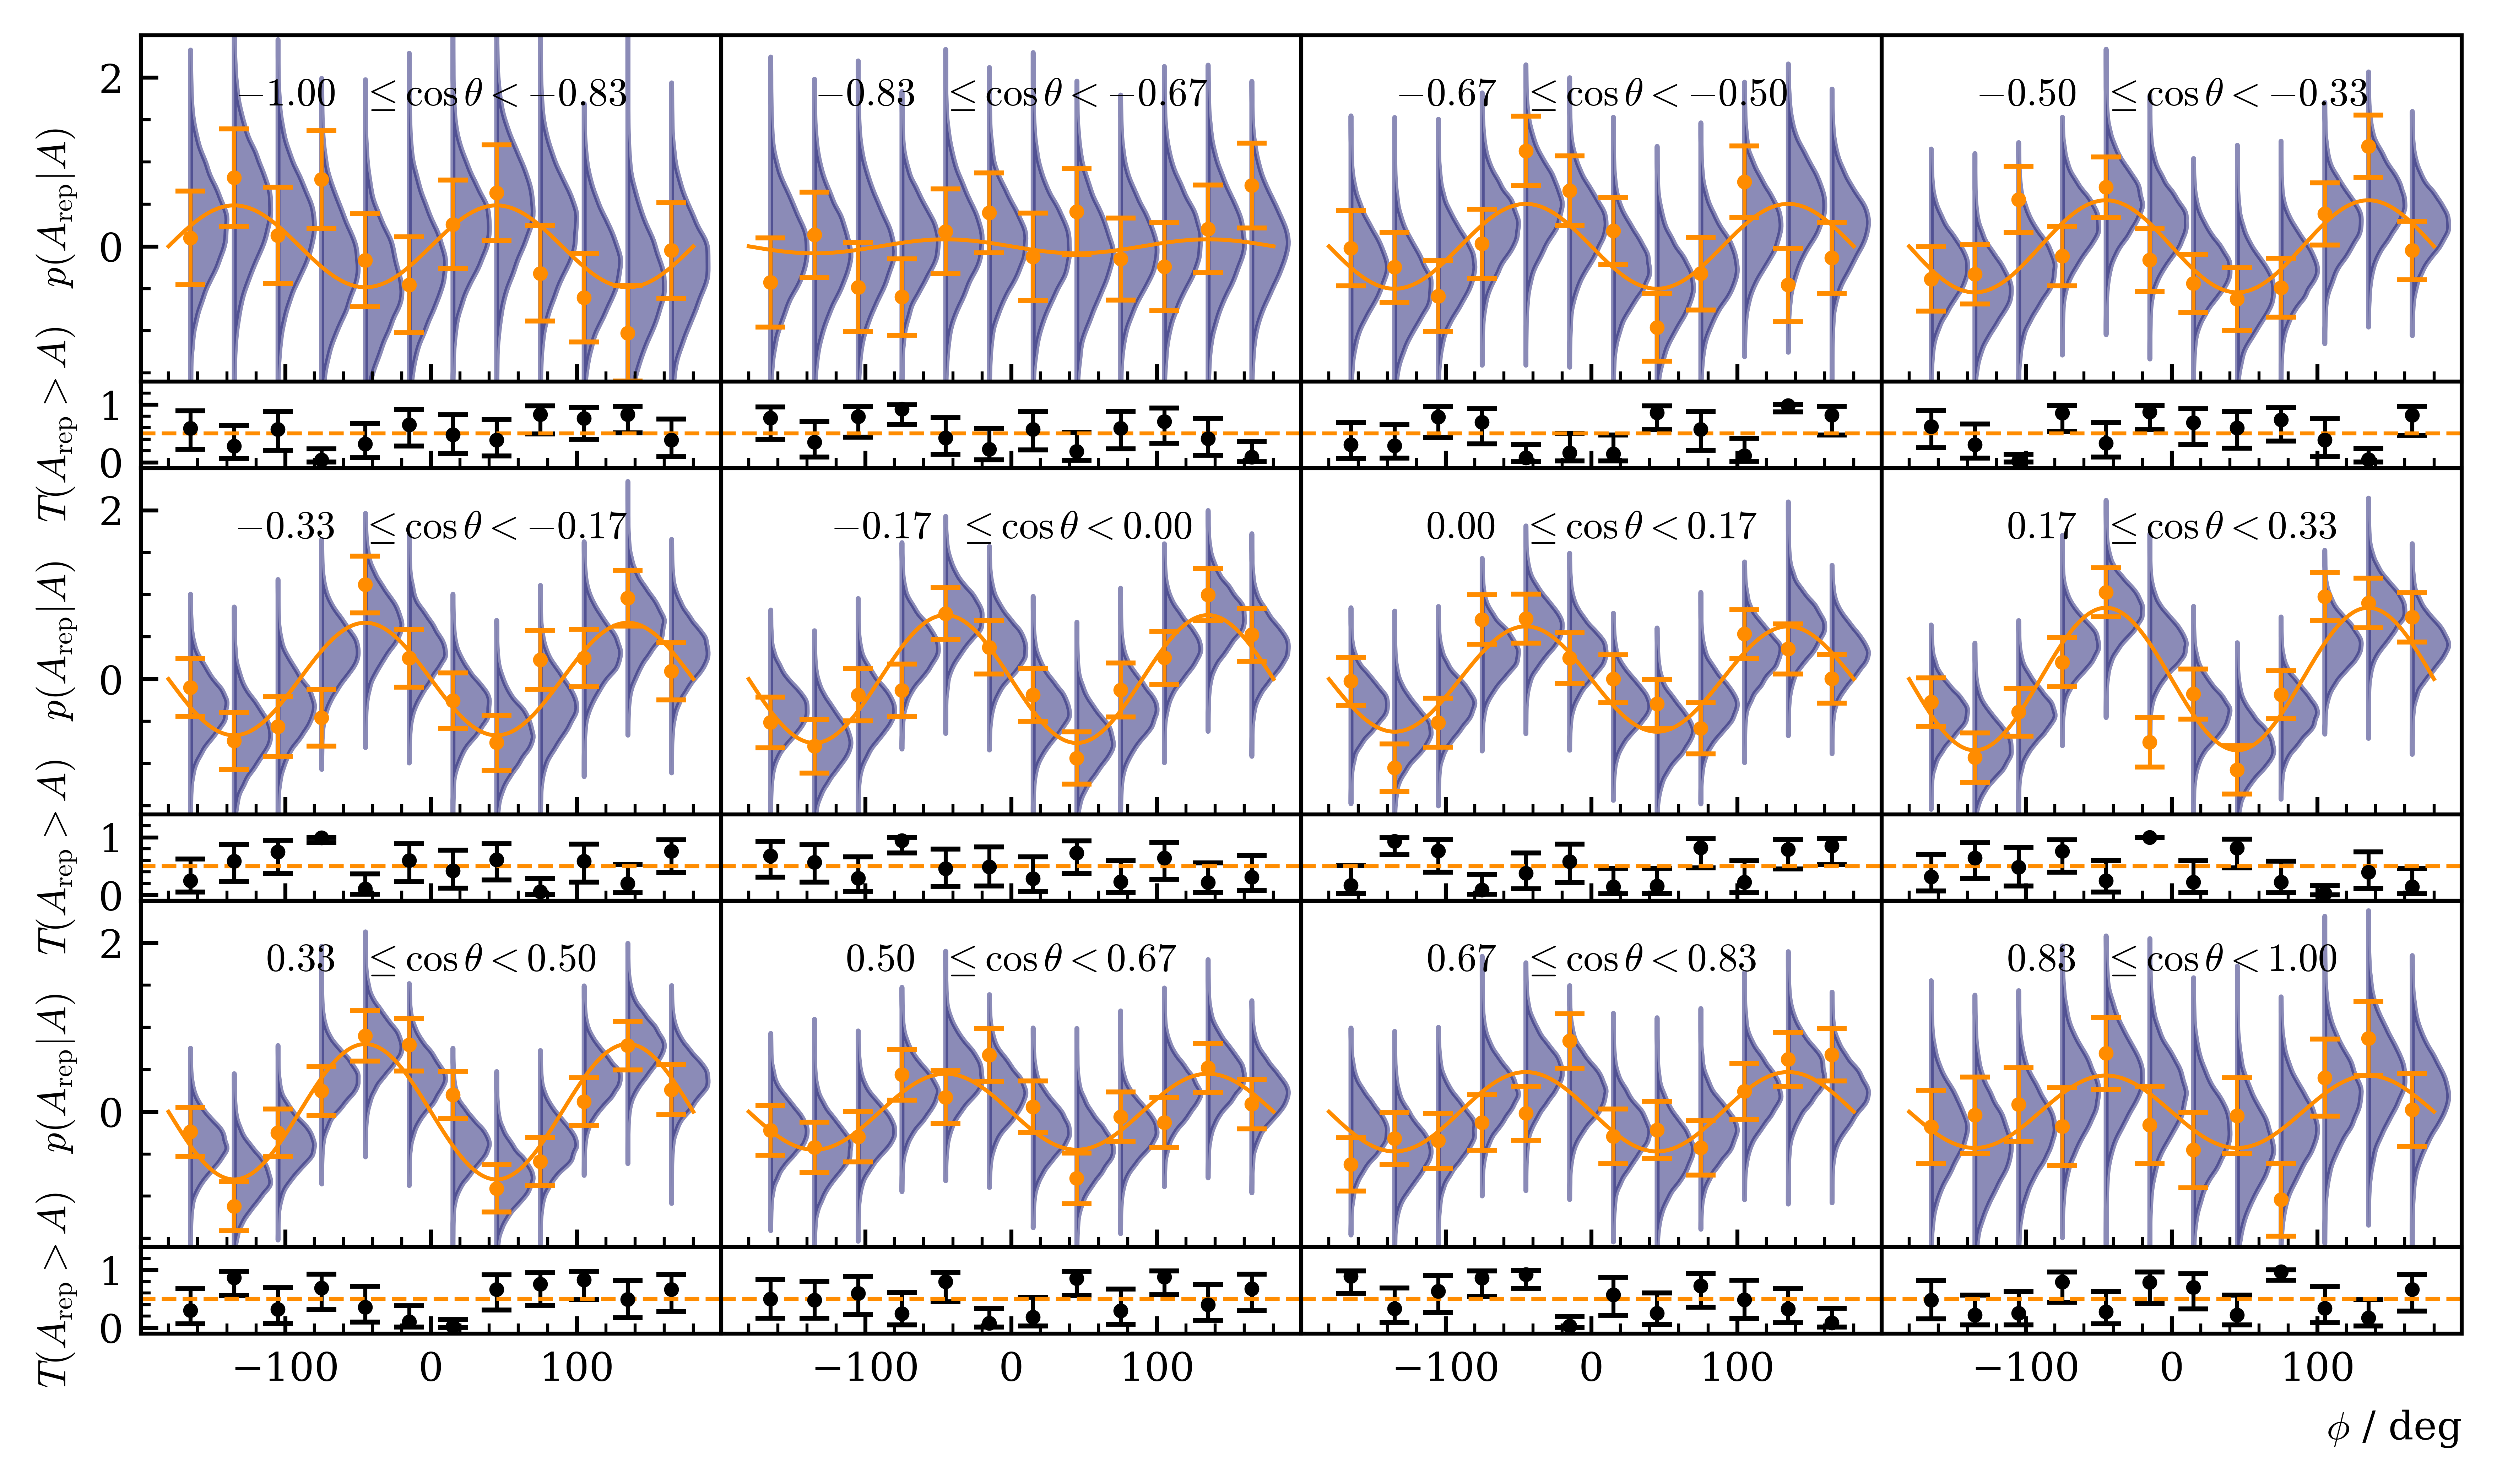

In [39]:
plt.rcParams['font.size']=8
fig = plt.figure(figsize=(21.41492/2.54,0.8*15.3728/2.54),dpi=1000)
outer = gridspec.GridSpec(3, 4, wspace=0, hspace=0)
nbinsphi=12
ebin=2
xvals=[-180+360/12/2+360/12*(i) for i in range(nbinsphi)]
#number of costheta bins
for i in range(12):
    currbin=f"ebin{ebin:02d}costbin{i:02d}"
    inner = gridspec.GridSpecFromSubplotSpec(2, 1,
                    subplot_spec=outer[i], wspace=0, hspace=0,height_ratios=[4,1])

    for j in range(2):
        ax = plt.Subplot(fig, inner[j])
        #t = ax.text(0.5,0.5, 'outer=%d, inner=%d' % (i, j))
        #t.set_ha('center')
        fig.add_subplot(ax)
        
        ax.set_xlim([-199,199])
        if(not(i==0 or i==4 or i==8)):
            ax.set_yticks([])
        #these are plots of the asymmetry
        if j<1:
            #read data
            df_tmp=final_df[['phi',f'A_{ebin,i}',f'dA_{ebin,i}']]
            df_tmp=df_tmp.rename(columns={'phi': 'x', f'A_{ebin,i}': 'y', f'dA_{ebin,i}': 'dy'})
            #print(df_tmp)
            asym=df_tmp['y'].values
            final_e=df_tmp['dy'].values
            ax.set_ylim([-1.6,2.5])
            if(i==0 or i==4 or i==8):
                ax.set_ylabel('$p(A_\mathrm{rep}|A)$')
            ytilde=[ppd_df[currbin+f'ytilde{i:02d}'] for i in range(12)]
            xx=np.linspace(-180,180,400)
            sigma_chi2=chi2_df[currbin]['sigma']
            yy=sigma_chi2*np.cos(2*np.pi/180.*(-45-xx))
            ax.plot(xx,yy,'r-',label='$\chi^2$ fit',color='darkorange',linewidth=0.8)
            #plot asymmetry
            ax.errorbar(x=xvals,y=asym,yerr=final_e,fmt='.',elinewidth=0.8,markersize=4,label='Data points',color='darkorange')
            #violinplot for the replicated samples
            vp=ax.violinplot(ytilde,np.array(xvals),
                         showmeans=False, showextrema=False, showmedians=False,widths=50)
            #cosmetics
            for b in vp['bodies']:
                # get the center
                m = np.mean(b.get_paths()[0].vertices[:, 0])
                # modify the paths to not go further right than the center
                b.get_paths()[0].vertices[:, 0] = np.clip(b.get_paths()[0].vertices[:, 0], m, np.inf)
                b.set_alpha(.5)
                b.set_color('midnightblue')
            ax.tick_params(axis='both',which='both',direction='in')
            ax.text(0,1.8,fr'${(-1+i*2/12):.2f}$  $\leq \cos\theta < {(-1+(i+1)*2/12):.2f}$',fontsize=8,ha='center',va='center')
 
        #plot p vals    
        else:
            ax.set_ylim([-0.1,1.4])
            ax.tick_params(axis='both',which='both',direction='in')
            pvalue=np.array([diagnostics_df[currbin].loc[f'pval{i:02d}'] for i in range(nbinsphi)])
            pvalue_lower=np.array([diagnostics_df[currbin].loc[f'pval_lerr{i:02d}'] for i in range(nbinsphi)])
            pvalue_upper=np.array([diagnostics_df[currbin].loc[f'pval_uerr{i:02d}'] for i in range(nbinsphi)])
            pval_errors=[pvalue_lower,pvalue_upper]
            #plot pvalue
            #ax1.grid(which='minor',color='grey',lw='.4')
            ax.errorbar(x=xvals,y=pvalue,yerr=pval_errors,fmt='.',color='black',elinewidth=0.8,markersize=4)
            ax.axhline(y=0.5, color='darkorange', linestyle='--',label='optimal value',linewidth=0.8)
            if(i==11):
                ax.set_xlabel('$\phi$ / deg',horizontalalignment="right",x=1.0)
            if(i==0 or i==4 or i==8):
                ax.set_ylabel('$T(A_\mathrm{rep}>A)$')

plt.show()
fig.savefig('./plots/ppd_checks.pdf',format='pdf',dpi=1000,bbox_inches='tight')

# Monte Carlo standard Error

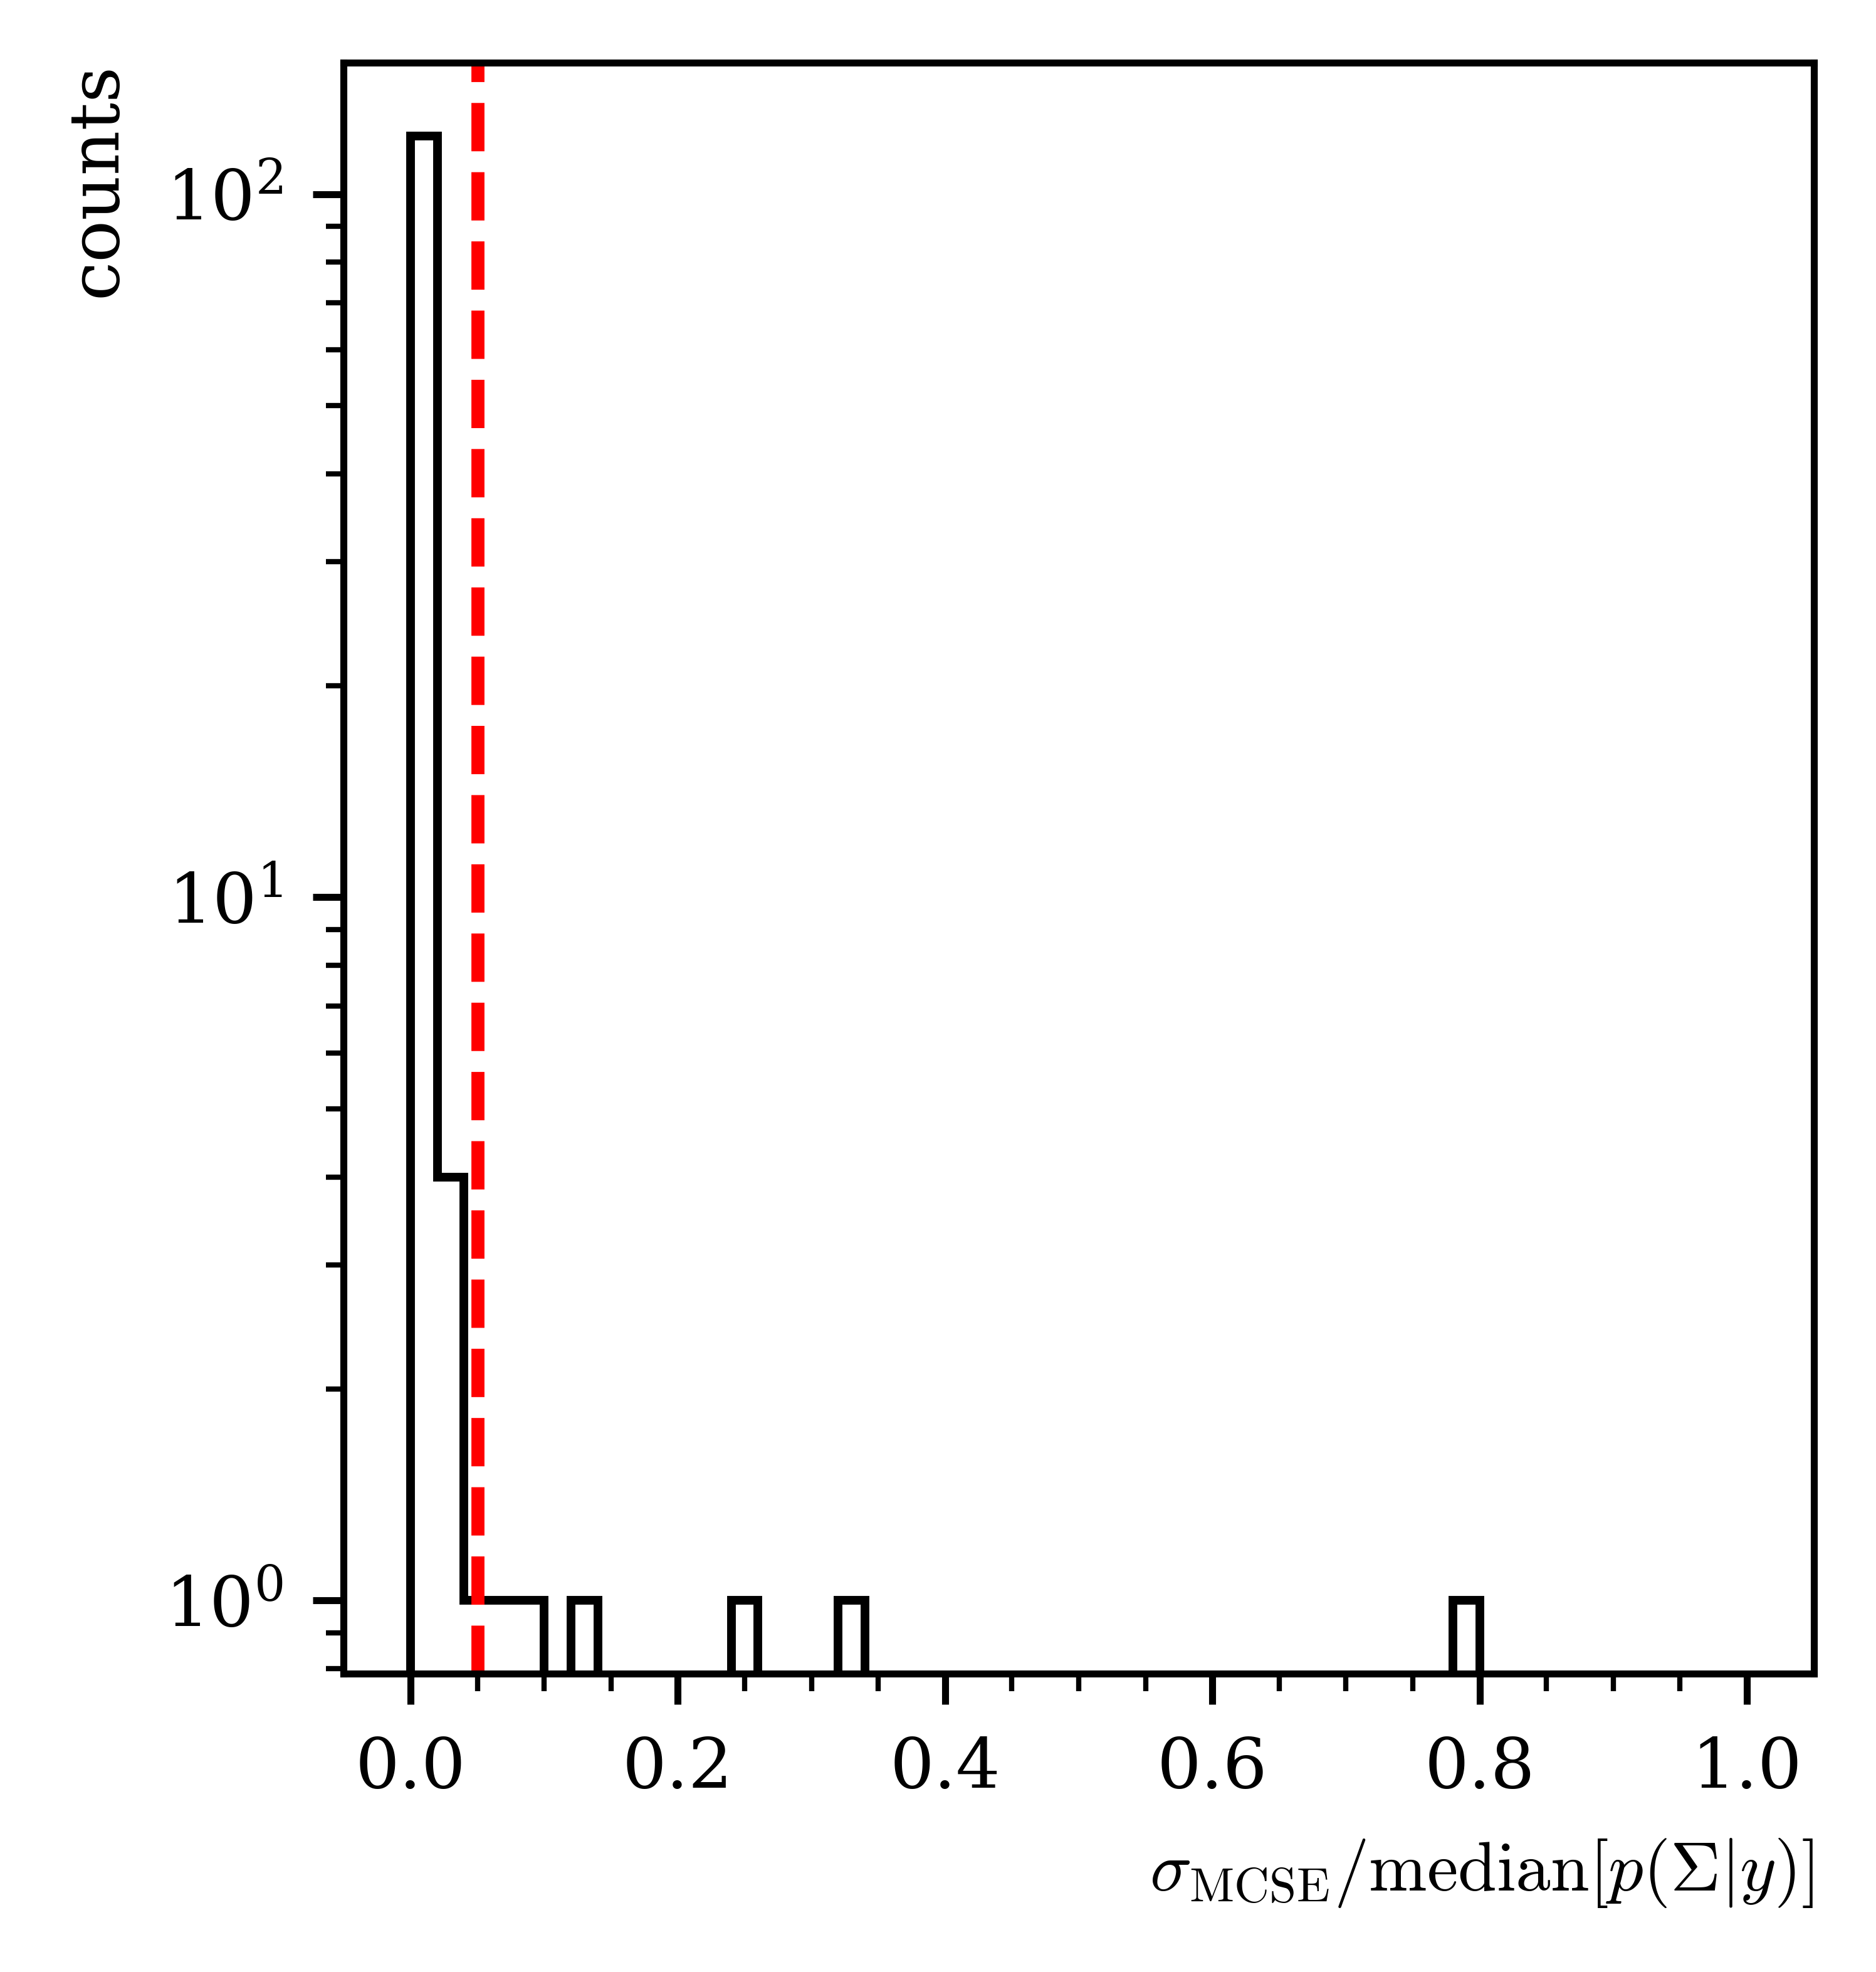

In [8]:
plt.rcParams['font.size']=8
fig, ax = plt.subplots(figsize=([15.3728/2.54/2,8.6472/2.54]),dpi=1000)

ax.hist(np.abs(np.array(diagnostics_df.loc['mcse'].values)/np.array(diagnostics_df.loc['sigma_median'].values)),histtype='step',log=True,range=[0,1],bins=50)
#ax.set_xlim([0,1])
#plt.hist(np.abs(np.array(diagnostics_df.loc['mcse'].values)),histtype='step',bins=20)
ax.set_xlabel(r'$\sigma_\mathrm{MCSE}/\mathrm{median}[p(\Sigma|y)]$',horizontalalignment='right',x=1.0)
ax.set_ylabel('counts',horizontalalignment='right',y=1.0)
ax.axvline(x=0.05,color='red',linestyle='--')
ax.grid(False)
#plt.xscale('log')
#plt.savefig('./plots/toyMC_mcse_hist_raw.pdf',format='pdf',dpi=1000,bbox_inches='tight')
plt.show()
fig.savefig('./plots/mcse_hist.pdf',format='pdf',dpi=1000,bbox_inches='tight')

In [9]:
rel_err=np.abs(np.array(diagnostics_df.loc['mcse'].values)/np.array(diagnostics_df.loc['sigma_median'].values))
len(rel_err[rel_err<=0.05])/len(rel_err)

0.946969696969697

In [10]:
index=np.where(rel_err>=0.05)

In [11]:
index

(array([  0,   1,  12,  49, 111, 113, 125]),)

In [12]:
np.array(diagnostics_df.loc['sigma_median'].values)[index]

array([ 0.09  , -0.032 ,  0.034 , -0.0026, -0.025 , -0.0043,  0.0058])

# Rhat statistics

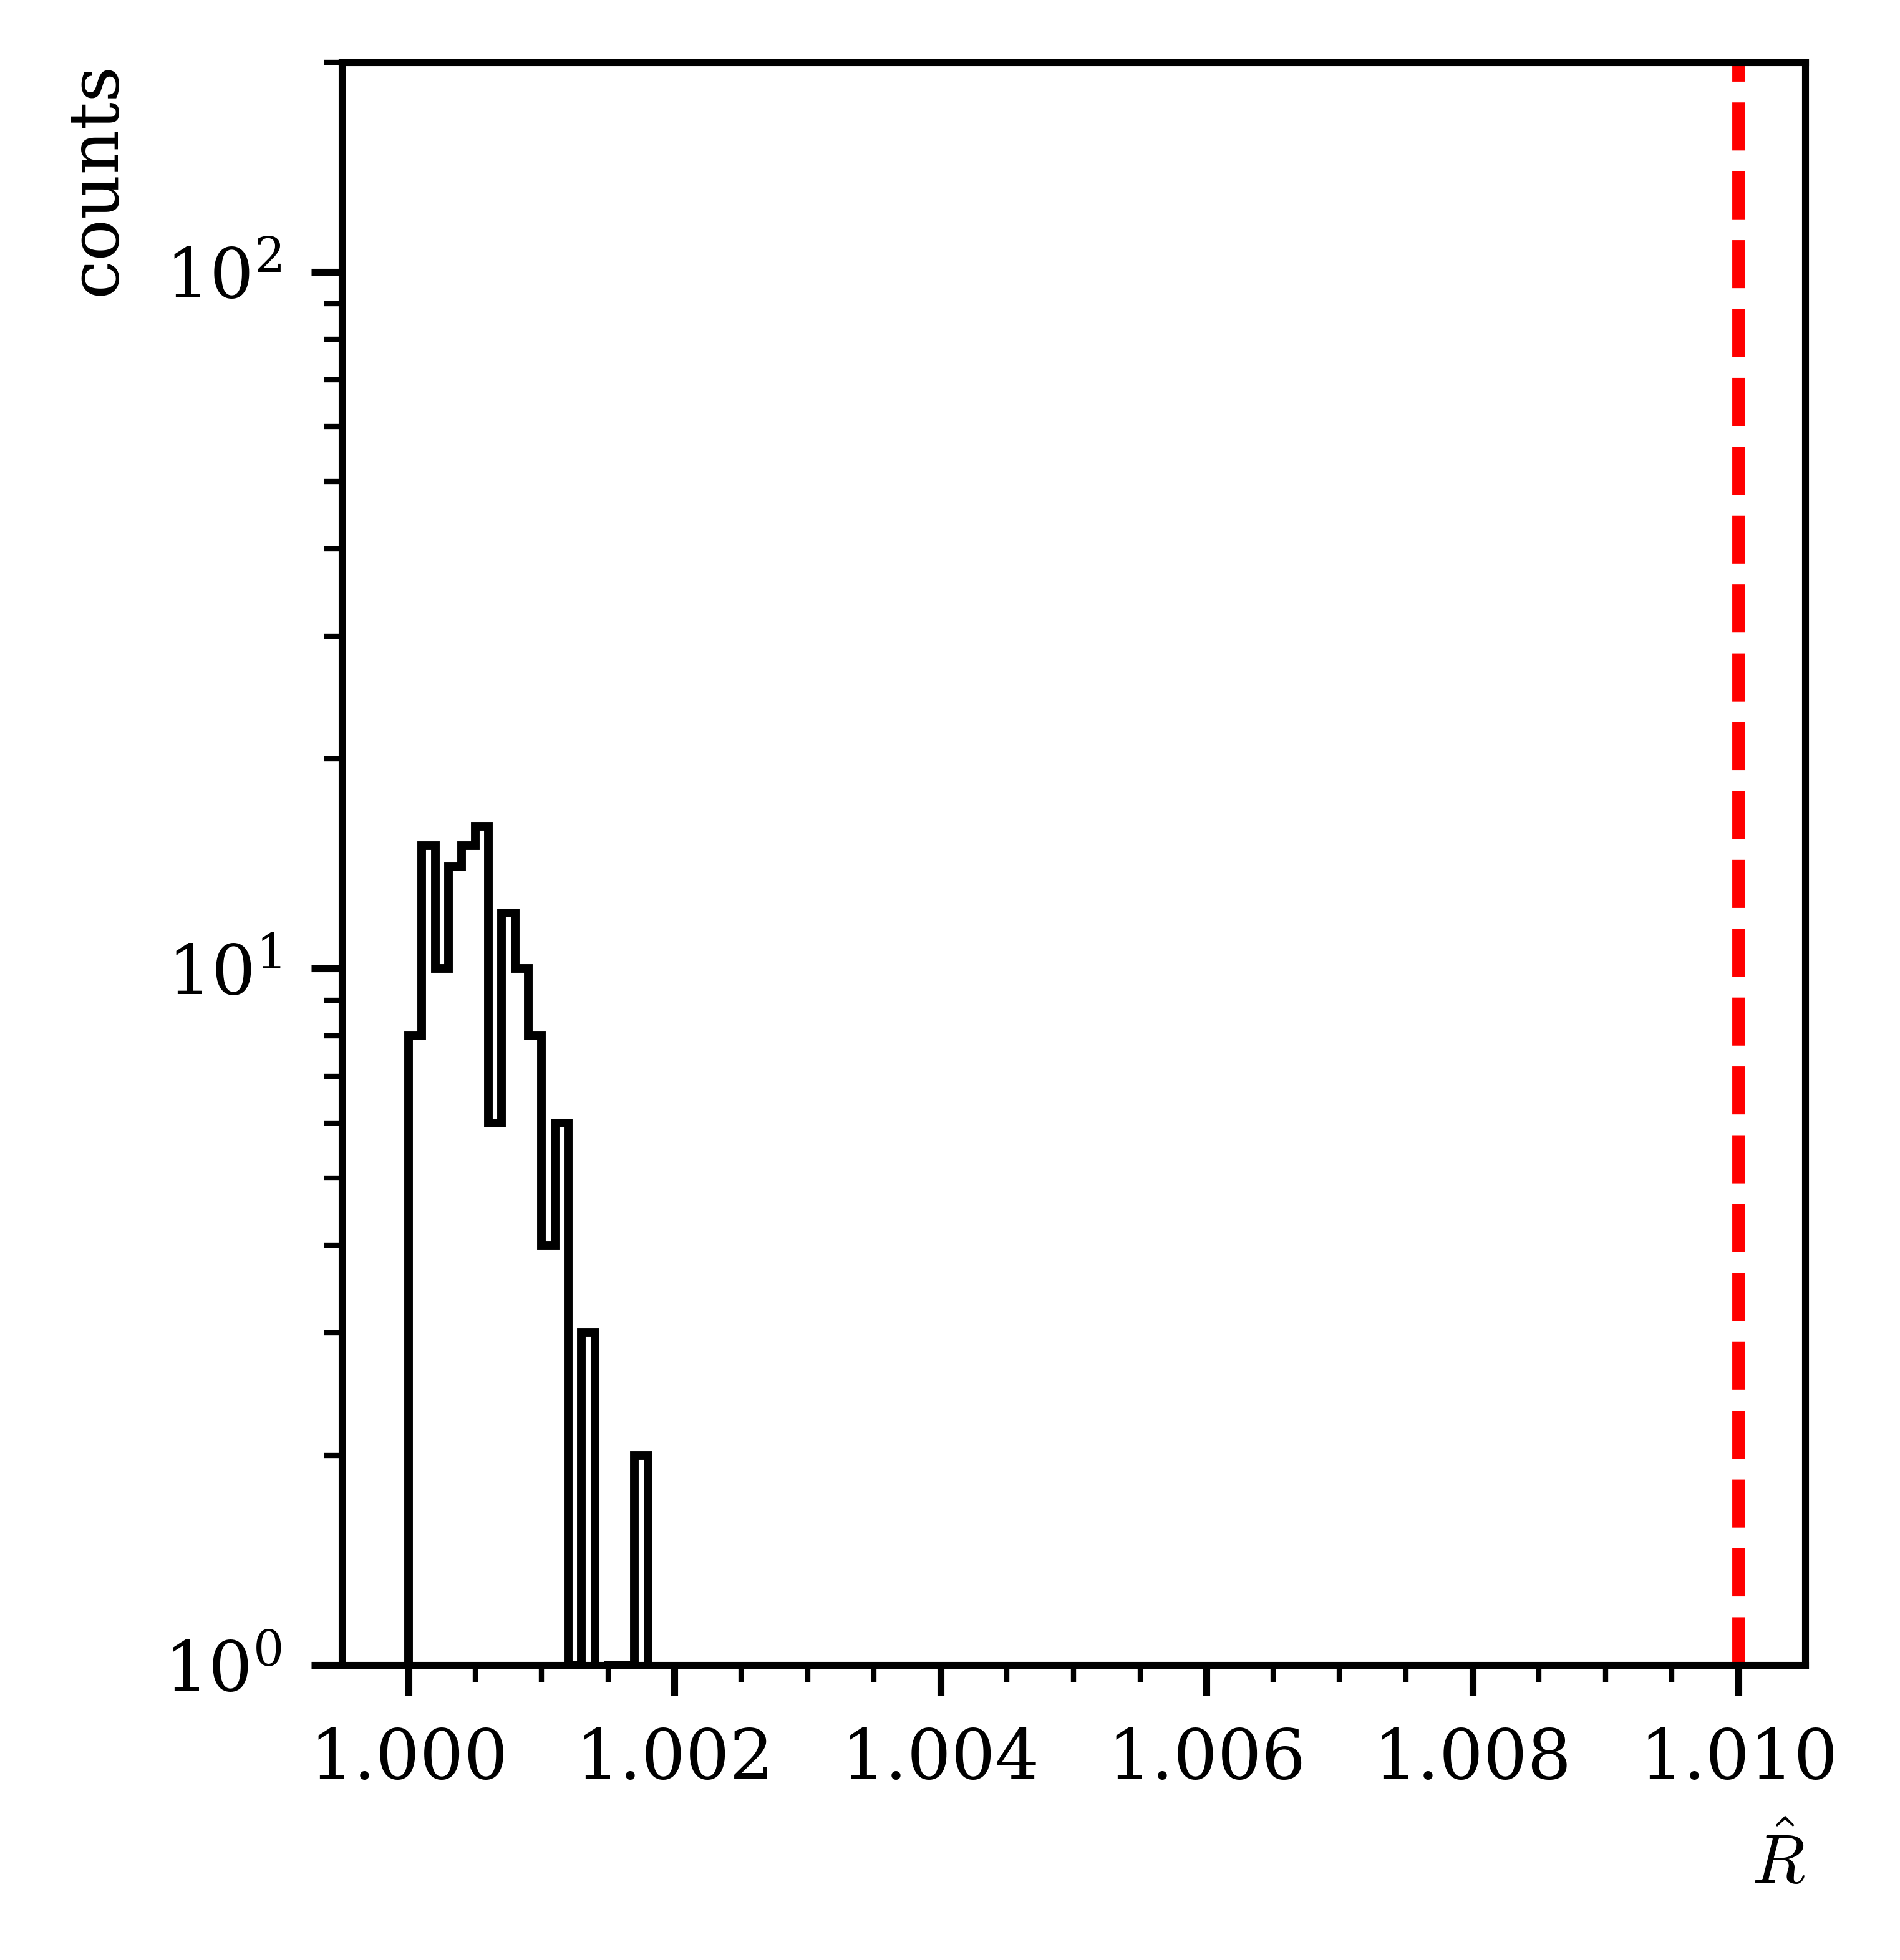

In [7]:
plt.rcParams['font.size']=8
fig, ax = plt.subplots(figsize=([15.3728/2.54/2,8.6472/2.54]),dpi=1000)

ax.hist(diagnostics_df.loc['rhat'].values,histtype='step',log=True,range=([1.00,1.01]),bins=100)
#ax.set_xlim([0,1])
#plt.hist(np.abs(np.array(diagnostics_df.loc['mcse'].values)),histtype='step',bins=20)
ax.set_xlabel(r'$\hat{R}$',horizontalalignment='right',x=1.0)
#ax.set_xlabel(r'$\sigma_\mathrm{MCSE}/\mathrm{median}[p(\Sigma|y)]$',horizontalalignment='right',x=1.0)
ax.set_ylabel('counts',horizontalalignment='right',y=1.0)
ax.set_ylim([1e0,2e2])
ax.axvline(x=1.01,color='red',linestyle='--')
ax.grid(False)
#plt.xscale('log')
#plt.savefig('./plots/toyMC_mcse_hist_raw.pdf',format='pdf',dpi=1000,bbox_inches='tight')
plt.show()
fig.savefig('./plots/rhat_hist.pdf',format='pdf',dpi=1000,bbox_inches='tight')

# Distribution of all pvalues

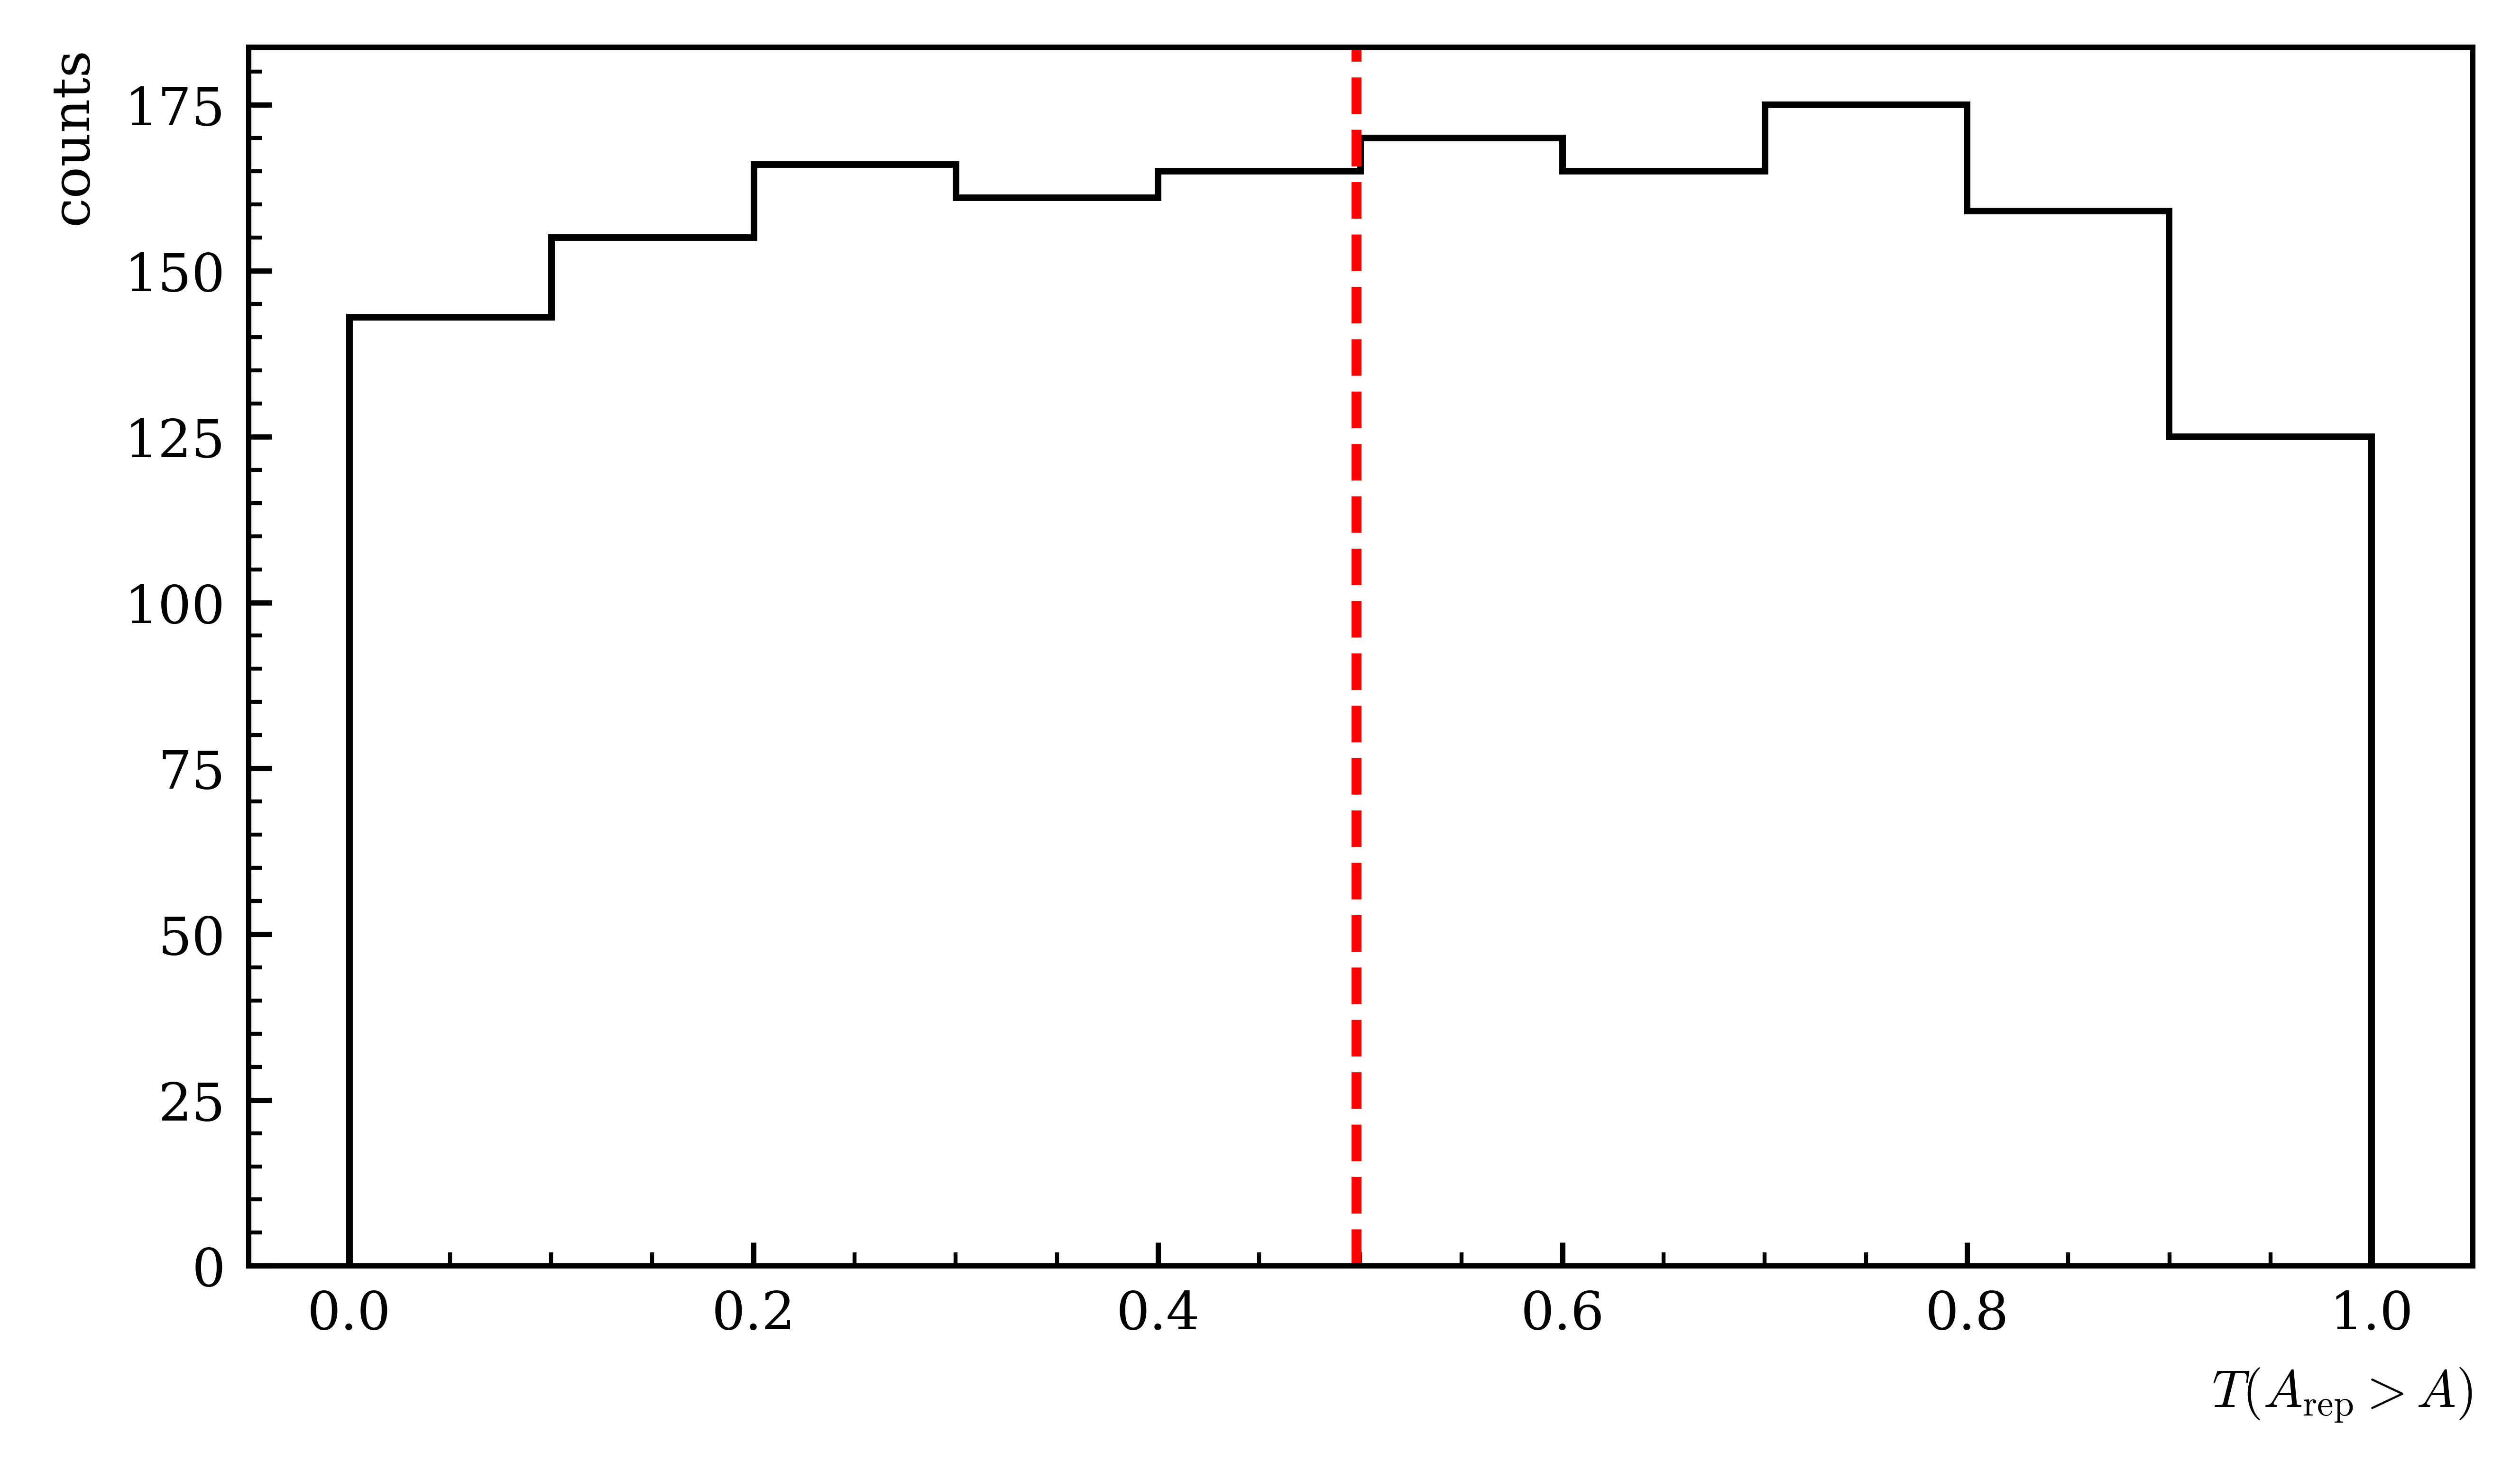

In [23]:
plt.rcParams['font.size']=8
pvals=diagnostics_df.loc[[f'pval{i:02d}' for i in range(12)]]
fig, ax = plt.subplots(dpi=1000,figsize=[15.3728/2.54,8.6472/2.54])
ax.hist(pvals.values.ravel(),histtype='step')
ax.set_xlabel('$T(A_\mathrm{rep}>A)$',horizontalalignment='right',x=1.0)
ax.set_ylabel('counts',horizontalalignment='right',y=1.0)
#ax.axvline(x=0.5,color='red')
ax.axvline(x=np.mean(pvals.values.ravel()),color='red',ls='--')
ax.tick_params(axis='both',which='both',direction='in')
ax.grid(False)
plt.show()
fig.savefig('./plots/pval_hist.pdf',format='pdf',dpi=1000,bbox_inches='tight')

#len(pvals.values.ravel())